# Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
path = '..\\Datasets\\kaggle_competitions\\titanic\\'
train_data = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análise feita com o uso do Power BI.

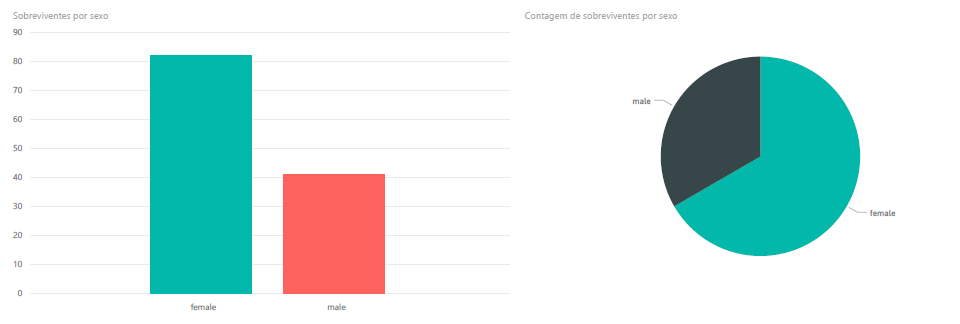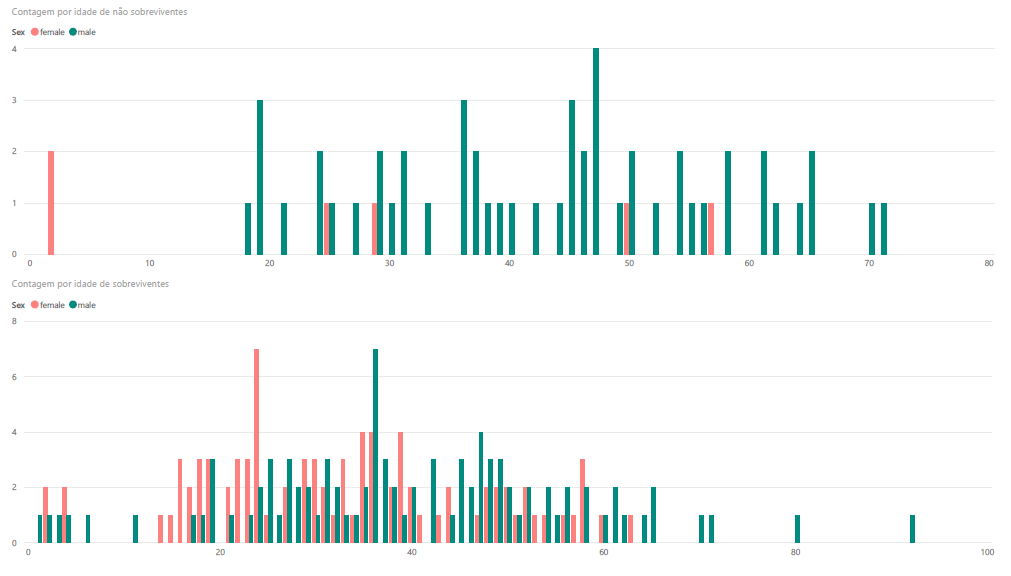

In [47]:
exclude_features = ['PassengerId','Name', 'SibSp','Cabin','Ticket']
train_data = train_data.drop(exclude_features, axis= 1)
test = test.drop(exclude_features, axis =1)
train_data = train_data.fillna(0, axis= 0)
test = test.fillna(0, axis=0)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder_sex = LabelEncoder()
encoder_embarked = LabelEncoder()
scaler = StandardScaler()

train_data['Sex'] = encoder_sex.fit_transform(train_data['Sex'])
train_data['Embarked']= encoder_embarked.fit_transform(train_data['Embarked'].astype(str))

test['Sex'] = encoder_sex.transform(test['Sex'])
test['Embarked']= encoder_embarked.transform(test['Embarked'].astype(str))

train_data_features = train_data.drop('Survived', axis = 1)
train_data_labels = train_data['Survived']

train_data = scaler.fit_transform(train_data)
test = scaler.fit_transform(test)

In [52]:
model = RandomForestClassifier(n_estimators= 8)

model.fit(train_data_features,train_data_labels)
predictions =model.predict(test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = pd.read_csv(path+'gender_submission.csv')

print(confusion_matrix(result['Survived'], predictions))
print(classification_report(result['Survived'], predictions))
print(accuracy_score(result['Survived'], predictions) *100)

[[266   0]
 [  0 152]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       266
          1       1.00      1.00      1.00       152

avg / total       1.00      1.00      1.00       418

100.0


In [54]:
resultado = pd.DataFrame({'PassengerId': result['PassengerId'], 'Survived': predictions})
resultado.to_csv('submission.csv', index=False)
